### EDIT LOG
https://machinelearningmastery.com/data-preparation-gradient-boosting-xgboost-python/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder

from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Reading file and tidying

#### Reading csv file

In [2]:
df = pd.read_csv("../Data/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### Drop column(s)

In [3]:
# Have to drop
df.drop(columns=["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1, inplace=True)

# Choose to drop these columns due to correlation from EDA
df.drop(columns=["Customer_Age", "Avg_Open_To_Buy", "Total_Trans_Ct"], axis=1, inplace=True)

df.head()

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,1.625,0.061
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,3.714,0.105
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,2.333,0.000
3,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,2.333,0.760
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,2.500,0.000


#### Renaming columns

In [4]:
df.columns = ['attrition_flag', 'gender', 'dependent_count', 'education_level', 
              'marital_status', 'income_category', 'card_category', 'months_on_book', 
              'total_relationship_count', 'months_inactive_12_month', 'contacts_count_12_month', 
              'credit_limit', 'total_revolving_bal', 'total_amt_change_q4_q1', 
              'total_trans_amt','total_count_change_q4_q1', 'avg_utilization_ratio']

numerical = ['dependent_count', 'months_on_book', 
             'total_relationship_count', 'months_inactive_12_month',
             'contacts_count_12_month', 'credit_limit', 'total_revolving_bal',
             'total_amt_change_q4_q1', 'total_trans_amt',
             'total_count_change_q4_q1', 'avg_utilization_ratio']

df.head()

,attrition_flag,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_month,contacts_count_12_month,credit_limit,total_revolving_bal,total_amt_change_q4_q1,total_trans_amt,total_count_change_q4_q1,avg_utilization_ratio
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,1.625,0.061
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,3.714,0.105
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,2.333,0.000
3,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,2.333,0.760
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,2.500,0.000


#### Check the number of unique category for each categorical column

In [5]:
categorical = ['gender','education_level', 'marital_status', 'income_category', 'card_category']

for cat in categorical:
    print(df[cat].unique())

['M' 'F']
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
['Married' 'Single' 'Unknown' 'Divorced']
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
['Blue' 'Gold' 'Silver' 'Platinum']


# Encoding categorical columns

#### Label encoding categorical columns with 2 types of categories

In [6]:
label_enc = LabelEncoder()
df["gender"] = label_enc.fit_transform(df["gender"])
df["attrition_flag"] = label_enc.fit_transform(df["attrition_flag"])
df.head()

,attrition_flag,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_month,contacts_count_12_month,credit_limit,total_revolving_bal,total_amt_change_q4_q1,total_trans_amt,total_count_change_q4_q1,avg_utilization_ratio
0,1,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,1.625,0.061
1,1,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,3.714,0.105
2,1,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,2.333,0.000
3,1,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,2.333,0.760
4,1,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,2.500,0.000


#### One Hot Encoding `marital_status` column & Combining back to dataframe

In [7]:
onehot_enc = OneHotEncoder()
reshape = np.array(df["marital_status"]).reshape(-1, 1)
values = onehot_enc.fit_transform(reshape).toarray().astype(int)
labels = np.array(["divorced", "married", "single", "unknown_marital_status"]).ravel()
marital_status_df = pd.DataFrame(values, columns=labels)

df = df.join(marital_status_df["divorced"])
df = df.join(marital_status_df["married"])
df = df.join(marital_status_df["single"])
df = df.join(marital_status_df["unknown_marital_status"])

df.drop("marital_status", axis=1, inplace=True)

df.head()

,attrition_flag,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_month,contacts_count_12_month,credit_limit,total_revolving_bal,total_amt_change_q4_q1,total_trans_amt,total_count_change_q4_q1,avg_utilization_ratio,divorced,married,single,unknown_marital_status
0,1,1,3,High School,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,1.625,0.061,0,1,0,0
1,1,0,5,Graduate,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,3.714,0.105,0,0,1,0
2,1,1,3,Graduate,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,2.333,0.000,0,1,0,0
3,1,0,4,High School,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,2.333,0.760,0,0,0,1
4,1,1,3,Uneducated,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,2.500,0.000,0,1,0,0


#### Ordinal Encoding: `education_level`, `income_category`, `card_category`

In [8]:
edu_level_mapper = {"Doctorate":1, "Post-Graduate":2, "Graduate":3, "College": 4, "High School": 5, "Uneducated": 6, "Unknown": 7}
df["education_level"] = df["education_level"].replace(edu_level_mapper)

In [9]:
income_cat_mapper = {"$120K +":1, "$80K - $120K":2, "$60K - $80K":3, "$40K - $60K": 4, "Less than $40K": 5, "Unknown": 6}
df["income_category"] = df["income_category"].replace(income_cat_mapper)

In [10]:
card_cat_mapper = {"Platinum":1, "Gold":2, "Silver":3, "Blue": 4}
df["card_category"] = df["card_category"].replace(card_cat_mapper)

# Data transformation

In [11]:
skewed_cols = []

for num in numerical:
    if df[num].skew() < -1 or df[num].skew() > 1:
        skewed_cols.append(num)
print(skewed_cols)

for col in skewed_cols:
    df[col] = np.log(df[col].mask(df[col] <=0)).fillna(0)

df.head()

['credit_limit', 'total_amt_change_q4_q1', 'total_trans_amt', 'total_count_change_q4_q1']


,attrition_flag,gender,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_month,contacts_count_12_month,credit_limit,total_revolving_bal,total_amt_change_q4_q1,total_trans_amt,total_count_change_q4_q1,avg_utilization_ratio,divorced,married,single,unknown_marital_status
0,1,1,3,5,3,4,39,5,1,3,9.448648,777,0.288931,7.042286,0.485508,0.061,0,1,0,0
1,1,0,5,3,5,4,44,6,1,2,9.018695,864,0.432432,7.163172,1.312109,0.105,0,0,1,0
2,1,1,3,3,2,4,36,4,1,0,8.136811,0,0.953201,7.542744,0.847155,0.000,0,1,0,0
3,1,0,4,5,5,4,34,3,4,1,8.105609,2517,0.340037,7.065613,0.847155,0.760,0,0,0,1
4,1,1,3,6,3,4,21,5,1,0,8.458716,0,0.777029,6.704414,0.916291,0.000,0,1,0,0


In [12]:
df.skew()

attrition_flag             -1.848449
gender                      0.116537
dependent_count            -0.020826
education_level            -0.002252
income_category            -0.467760
card_category              -4.605743
months_on_book             -0.106565
total_relationship_count   -0.162452
months_inactive_12_month    0.633061
contacts_count_12_month     0.011006
credit_limit                0.457081
total_revolving_bal        -0.148837
total_amt_change_q4_q1     -1.024660
total_trans_amt             0.262210
total_count_change_q4_q1   -1.125235
avg_utilization_ratio       0.718008
divorced                    3.259090
married                     0.149146
single                      0.453898
unknown_marital_status      3.256333
dtype: float64

#### Defining x and y (target) variables

In [13]:
y = df["attrition_flag"]
x = df.drop("attrition_flag", axis=1)

#### Perform Chi-Square for feature selection
H0 :- There is no relationship between categorical feature and target variable\
H1 :- There is some relationship between categorical feature and target variable\
If p-value ≥0.05, the null hypothesis is not rejected and there is no any relationship between target variable and categorical features.

In [14]:
# # https://medium.com/analytics-vidhya/categorical-feature-selection-using-chi-squared-test-e4c0d0af6b7e
# # https://towardsdatascience.com/using-the-chi-squared-test-for-feature-selection-with-implementation-b15a4dad93f1

# # Standardisation gives negative values, chi-square does not allow negative values

# chi_scores = chi2(x,y)
# p_values = pd.Series(chi_scores[1],index = x.columns)
# p_values.sort_values(ascending = False , inplace = True)
# p_values.plot.bar()

# # conclusion: current_house_years, profession_encoded, state_encoded have no relationship with target variable
# x = x.drop(["current_house_years", "profession_encoded", "state_encoded"], axis=1)

#### Standardising columns

In [15]:
# # Scale all except columns which are one-hot encoded and label encoded

# # With Chi-Square
# to_scale = ["income", "age", "experience", "current_job_years", "city_encoded"]
# no_scale = ["marital_status", "car_ownership", "norent_noown", "owned", "rented"]

# # Without Chi-Square
# # to_scale = ["income", "age", "experience", "current_job_years", "current_house_years", "profession_encoded", "city_encoded", "state_encoded"]
# # no_scale = ["marital_status", "car_ownership", "norent_noown", "owned", "rented"]

# scaler = StandardScaler()
# scaled = scaler.fit_transform(x[to_scale])
# scaled_df = pd.DataFrame(data=scaled, columns=to_scale)

# for col in to_scale:
#     x[col] = scaled_df[col]
    
# x.head()

# Preparing for modelling

#### Splitting the dataset into train and test sets

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2021)

#### Performing PCA

In [17]:
# pca_loan = PCA()
# x_train = pca_loan.fit_transform(x_train)
# x_test = pca_loan.fit_transform(x_test)

#### Perform oversampling on train data

<AxesSubplot:xlabel='attrition_flag', ylabel='count'>

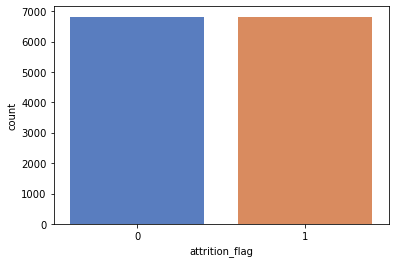

In [19]:
oversampler = SMOTE()
x_train, y_train = oversampler.fit_resample(x_train, y_train)

sns.countplot(x = y_train, palette = 'muted')

#### Applying xgboost model

In [20]:
# # https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
xgb = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    random_state=2021)

# {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#  "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  "min_child_weight" : [ 1, 3, 5, 7 ],
#  "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ], Minimum loss reduction required to make a further partition on a leaf node of the tree.
#  "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
# GridSearch, Coordinate Descent

xgb.fit(x_train, y_train, eval_metric='logloss')
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 286   55]
 [  50 1635]]


In [21]:
print("-------------------------TEST SCORES-----------------------")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"AUC Score: {roc_auc_score(y_test, y_pred)}")

-------------------------TEST SCORES-----------------------
Recall: 0.9703264094955489
Precision: 0.9674556213017751
F1-Score: 0.9688888888888887
Accuracy score: 0.9481737413622903
AUC Score: 0.9045180434574519
